<a href="https://colab.research.google.com/github/Reuben17/linear-regression-model/blob/main/linear%20regression%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
!pip install Faker
from faker import Faker


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [184]:
from typing import Reversible
from numpy.ma.core import sort
import pandas as pd
import random
from faker import Faker
from random import randrange
from datetime import datetime

nr_of_offices= 100
fake= Faker('de_DE')
offices=[]

for offices_id in range(nr_of_offices):

  size = fake.pyfloat(right_digits=2,min_value=1, max_value=50, positive = True)
  price = size + 1
  
  offices.append([size,price])
offices_df =pd.DataFrame(offices,columns=['size','price'])
offices_df.sort_values(by=['size'], inplace=True)

pd.pandas.set_option('display.max_columns',None)
print(offices_df)


     size  price
84   1.70   2.70
37   2.60   3.60
36   4.00   5.00
49   4.37   5.37
42   4.56   5.56
..    ...    ...
63  48.95  49.95
93  49.33  50.33
91  49.46  50.46
97  49.49  50.49
66  49.51  50.51

[100 rows x 2 columns]


In [ ]:
from google.colab import files
offices_df.to_csv('offices_df.csv')
files.download('offices_df.csv')

Cost error:0.045095252856013915
Office Price:100.13778933206238


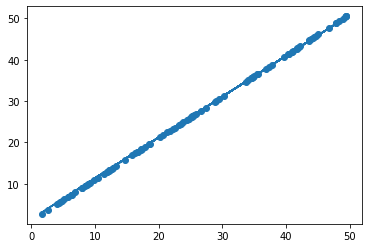

In [206]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
office_details = np.array(offices)
x=office_details[:,0]
y=office_details[:,1]

class model:
  def __init__(self,xArray,yArray):
     self.xArr=xArray
     self.yArr=yArray
     self.no_of_points = len(self.xArr)
     self.learnc = 0.000001
     self.weight = 3
     self.bias = 1.5
     self.cost = 0
  def getWeight(self):
    return self.weight

  def getBias(self):
    return self.bias

  def costError(self):
    total = 0;
    for i in range(self.no_of_points):
     total += (self.yArr[i] - (self.weight * self.xArr[i] + self.bias)) **2
    return total / self.no_of_points
    print(total / self.no_of_points)

  def updateWeights(self):
    wx=0
    w_deriv = 0
    b_deriv = 0
    for i in range(self.no_of_points): 
      wx = self.yArr[i] - (self.weight * self.xArr[i] + self.bias)
      w_deriv += -2 * wx * self.xArr[i]
      b_deriv += -2 * wx
  
    self.weight -= (w_deriv / self.no_of_points) * self.learnc
    self.bias -= (b_deriv / self.no_of_points) * self.learnc

  def trainFunction(self,iter):
    for i in range(iter):
     model.updateWeights(self)
     self.cost = model.costError(self)

  def plot(self): 
    y = self.weight * self.xArr + self.bias
    plt.scatter(self.xArr,self.yArr)
    plt.plot(self.xArr,y)

a =model(x,y)

a.trainFunction(10000)
a.plot()
c=a.costError()
print('Cost error:'+str(c))
w=  a.getWeight()
b = a.getBias()
office_price = (w * 100) + b
print("Office Price:"+str(office_price))


